## Data Information:
The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.

# Opening .data files

In [30]:
#.data est pour nous des fichiers texte, représentants chacun une lettre  
#ainsi que sa représentation sous forme de vecteur de chiffres.

In [ ]:
#https://www.pyimagesearch.com/2017/02/13/recognizing-digits-with-opencv-and-python/

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f = open("./Data/letter-recognition.data", "r")
#list(f)

In [5]:
header = ["letter", "rec_1", "rec_2", "rec_3", "rec_4", "rec_5", "rec_6", "rec_7", "rec_8", "rec_9", "rec_10", "rec_11", "rec_12", "rec_13", "rec_14", "rec_15", "rec_16"]
df = pd.read_csv("./Data/letter-recognition.data", names = header)

In [6]:
#tail() = to see the last 5 rows in the dataset
df.tail()

,letter,rec_1,rec_2,rec_3,rec_4,rec_5,rec_6,rec_7,rec_8,rec_9,rec_10,rec_11,rec_12,rec_13,rec_14,rec_15,rec_16
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
rec_1     20000 non-null int64
rec_2     20000 non-null int64
rec_3     20000 non-null int64
rec_4     20000 non-null int64
rec_5     20000 non-null int64
rec_6     20000 non-null int64
rec_7     20000 non-null int64
rec_8     20000 non-null int64
rec_9     20000 non-null int64
rec_10    20000 non-null int64
rec_11    20000 non-null int64
rec_12    20000 non-null int64
rec_13    20000 non-null int64
rec_14    20000 non-null int64
rec_15    20000 non-null int64
rec_16    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
pd.isna(df).any()

letter    False
rec_1     False
rec_2     False
rec_3     False
rec_4     False
rec_5     False
rec_6     False
rec_7     False
rec_8     False
rec_9     False
rec_10    False
rec_11    False
rec_12    False
rec_13    False
rec_14    False
rec_15    False
rec_16    False
dtype: bool

In [9]:
pd.isnull(df).any()

letter    False
rec_1     False
rec_2     False
rec_3     False
rec_4     False
rec_5     False
rec_6     False
rec_7     False
rec_8     False
rec_9     False
rec_10    False
rec_11    False
rec_12    False
rec_13    False
rec_14    False
rec_15    False
rec_16    False
dtype: bool

In [10]:
df['letter'].describe()

count     20000
unique       26
top           U
freq        813
Name: letter, dtype: object

In [11]:
df['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
Z    734
H    734
Name: letter, dtype: int64

# Part de chaque lettre, par count décroissant

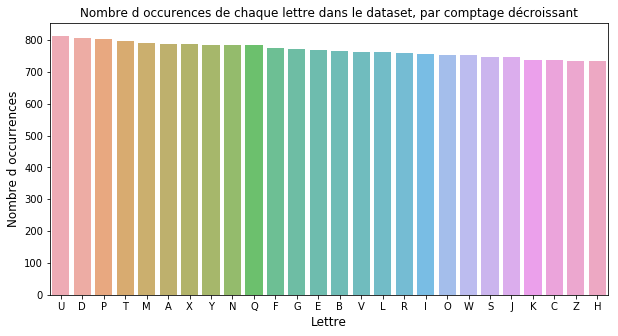

In [38]:
part_lettre = df['letter'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(part_lettre.index, part_lettre.values, alpha=0.8)
plt.title('Nombre d occurences de chaque lettre dans le dataset, par comptage décroissant')
plt.ylabel('Nombre d occurrences', fontsize=12)
plt.xlabel('Lettre', fontsize=12)
plt.show()

In [21]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
a
#plt.hist(a, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
#plt.show()

array([ 1.3315865 ,  0.71527897, -1.54540029, ...,  5.74446677,
        6.22449239,  8.42055014])

In [42]:
df_A = df.loc[df['letter'] == 'A'].iloc[:, 1:]
df_A

,rec_1,rec_2,rec_3,rec_4,rec_5,rec_6,rec_7,rec_8,rec_9,rec_10,rec_11,rec_12,rec_13,rec_14,rec_15,rec_16
7,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
78,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
118,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
130,2,1,4,2,1,8,1,2,2,7,2,8,2,5,2,7
134,3,7,5,5,3,10,4,1,2,8,3,9,2,4,2,7
144,2,4,4,3,2,10,2,2,2,9,2,9,2,7,3,9
147,2,8,4,6,2,12,2,4,3,11,2,10,3,6,3,9
157,8,15,7,8,4,8,2,3,2,8,5,12,5,4,5,5
163,3,3,5,4,1,7,6,3,0,7,0,8,2,7,1,8
216,3,5,5,7,2,7,7,3,1,6,0,8,3,7,1,8


## Penser à renommer les titres des graphiques et des abscisses/ordonnées

## Observation pour la lettre A

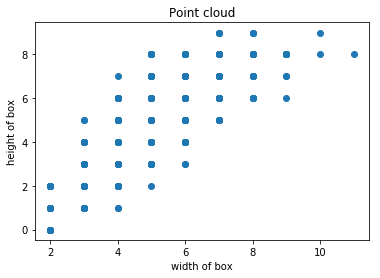

In [114]:
df_A = df.loc[df['letter'] == 'A'].iloc[:, 1:]
#plt.plot(df_A['rec_3'], df_A['rec_4'])
plt.scatter(df_A['rec_3'], df_A['rec_4'])
plt.title('Point cloud')
plt.xlabel('width of box')
plt.ylabel('height of box')
plt.show()

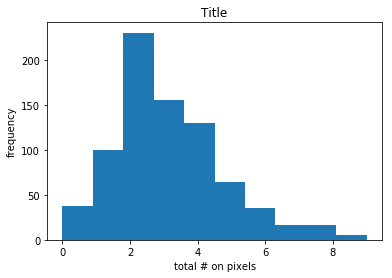

In [140]:
plt.hist(df_A['rec_5'])
plt.title('Title')
plt.xlabel('total # on pixels')
plt.ylabel('frequency')
plt.show()

## Observation pour toutes les lettres

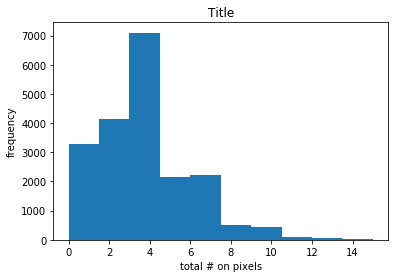

In [141]:
plt.hist(df['rec_5'])
plt.title('Title')
plt.xlabel('total # on pixels')
plt.ylabel('frequency')
plt.show()

# Word Embedding / Word2vec

In [19]:
import mnist

emnist_data = mnist(path='./Data/', return_type='numpy')
emnist_data.select_emnist('letter-recognition.data')
X, y = emnist_data.load_training()

TypeError: 'module' object is not callable

# Word Embedding / Word2vec